# Wiggleplots

The goal of this notebook is to estimate the plasma frequency 

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib
colorlist = list(matplotlib.colors.TABLEAU_COLORS)

from methods.SolutionClass2 import SolutionClass, _find_limits
from methods.save_load_data2 import save_data, load_data
from methods.make_input import make_plasma_input

In [2]:
def wiggle_fft_plot(solution, probe_index=0, peak_pos=1500, use_norm=True, norm_start=0):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    inset_ax = fig.add_axes([0.32, 0.26, 0.52, 0.56])

    data_to_plot = ["electric"]
    plot_style   = ["-"]

    t = solution.data_full["t"]

    for label, style in zip(data_to_plot, plot_style):
        t_probe = np.array(solution.data_full[label])[:, probe_index]

        fft = abs(np.fft.rfft(t_probe))
        freq_omega = 2*np.pi * np.fft.rfftfreq(t_probe.shape[-1], d=t[1]-t[0])
        if use_norm:
            #fft /= simpson(fft[norm_start:], x=freq[norm_start:])
            i_min = int(len(fft)*0.12)
            i_max = int(len(fft)*0.18)
            fft /= max(fft[i_min:i_max])

        ax.plot(freq_omega, fft, style, label=label)

        inset_ax.vlines(peak_pos, *inset_ax.get_ylim(), "k", linestyles="dashed")
        inset_ax.plot(freq_omega, fft, style, label=label)
        inset_ax.grid()

    ax.set_ylim((-0.08, 0.08))

    if use_norm:
        print("Freq at i_min:", freq_omega[i_min])
        print("Freq at i_max:", freq_omega[i_max])
        ax.set_ylim((-0.08, 0.08))
        pass
        
    inset_ax.set_ylim(ax.get_ylim())

    ax.set_title("Fourier transform of various time dependent signals at probe location {:.3f}".format(solution.data_full["x"][probe_index]))
    ax.set_xlabel(r"$\omega$")
    ax.set_ylabel("abs(fft)")

    inset_ax.set_xlabel(r"$\omega$")
    inset_ax.set_ylabel("abs(fft)")
    inset_ax.set_xlim((peak_pos-305*6, peak_pos+305*6))
    inset_ax.set_title("Peak zoom")

    plt.legend()
    plt.grid()
    plt.show()

In [2]:
if True:
    path = "DATA/Plasma-freq_data 2 LARGE/"
    sols = [
        load_data(path + "k1T1"),
        load_data(path + "k1T2"),
        load_data(path + "k1T3"),
        load_data(path + "k2T1"),
        load_data(path + "k2T2"),
        load_data(path + "k2T3"),
        load_data(path + "k3T1"),
        load_data(path + "k3T2"),
        load_data(path + "k3T3"),
    ]

sols = sols # For avoiding annoying error messages when above is 'False'

Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero


In [57]:
if False:
    for sol in sols:
        wiggle_fft_plot(sol, probe_index=0, peak_pos=9400, use_norm=False, norm_start=170)

___

#### Theoretical values of omega

In [5]:
nu_ue     = sols[0].constants["physical"]["nu_u"][0]
mu_e      = sols[0].constants["physical"]["mu"]
epsilon_D = sols[0].constants["physical"]["epsilon_D"]

for sol in sols:
    k    = sol.params["init"]["k"]
    T_e0 = sol.params["init"]["t_0"]
    n_e0 = sol.params["init"]["n_0"]
    #n_e0l= sol.params["init"]["n_l"]  # Same as above
    #n_e0r= sol.params["init"]["n_r"]  # 0.2x of above

    omega = (-1j*k**2*nu_ue + np.sqrt(-k**4*nu_ue**2 + 4*n_e0**2*(3*k**2*T_e0 + n_e0/epsilon_D)/mu_e)) / 2*n_e0
    omega_approx = np.sqrt((3*k**2*T_e0 + n_e0/epsilon_D)/mu_e)   
    omega_approx_reduced = np.sqrt(n_e0/epsilon_D/mu_e)

    print(f"k = {k:.5f}, T_e0 = {T_e0:.5f}, n_e0 = {n_e0:.5f}")
    print(f"omega: {omega:.7f}, omega_approx: {omega_approx:.7f}, omega_approx_reduced: {omega_approx_reduced:.7f}")
    print()
 

k = 0.00367, T_e0 = 0.60000, n_e0 = 1.00000
omega: 9409.1982256-0.0249137j, omega_approx: 9409.1982257, omega_approx_reduced: 9409.1982209

k = 0.00367, T_e0 = 1.00000, n_e0 = 1.00000
omega: 9409.1982288-0.0249137j, omega_approx: 9409.1982288, omega_approx_reduced: 9409.1982209

k = 0.00367, T_e0 = 1.40000, n_e0 = 1.00000
omega: 9409.1982319-0.0249137j, omega_approx: 9409.1982320, omega_approx_reduced: 9409.1982209

k = 0.00612, T_e0 = 0.60000, n_e0 = 1.00000
omega: 9409.1982338-0.0692048j, omega_approx: 9409.1982341, omega_approx_reduced: 9409.1982209

k = 0.00612, T_e0 = 1.00000, n_e0 = 1.00000
omega: 9409.1982426-0.0692048j, omega_approx: 9409.1982428, omega_approx_reduced: 9409.1982209

k = 0.00612, T_e0 = 1.40000, n_e0 = 1.00000
omega: 9409.1982513-0.0692048j, omega_approx: 9409.1982516, omega_approx_reduced: 9409.1982209

k = 0.00856, T_e0 = 0.60000, n_e0 = 1.00000
omega: 9409.1982457-0.1356414j, omega_approx: 9409.1982467, omega_approx_reduced: 9409.1982209

k = 0.00856, T_e0 = 

These correspond perfectly with the found values from the fourier transforms!

___

#### Testing some 'extremes'

In [6]:
import cmath

k    = 1
T_e0 = 2
n_e0 = 2

omega = (-1j*k**2*nu_ue + cmath.sqrt(-k**4*nu_ue**2 + 4*n_e0**2*(3*k**2*T_e0 + n_e0/epsilon_D)/mu_e)) / 2*n_e0
omega_approx = np.sqrt((3*k**2*T_e0 + n_e0/epsilon_D)/mu_e)   
omega_approx_reduced = np.sqrt(n_e0/epsilon_D/mu_e)

print(f"k = {k:.5f}, T_e0 = {T_e0:.5f}, n_e0 = {n_e0:.5f}")
print(f"omega: {omega:.7f}, omega_approx: {omega_approx:.7f}, omega_approx_reduced: {omega_approx_reduced:.7f}")

k = 1.00000, T_e0 = 2.00000, n_e0 = 2.00000
omega: 53101.0237521-3699.9999998j, omega_approx: 13307.4432263, omega_approx_reduced: 13306.6157351


___
___

## Final plots

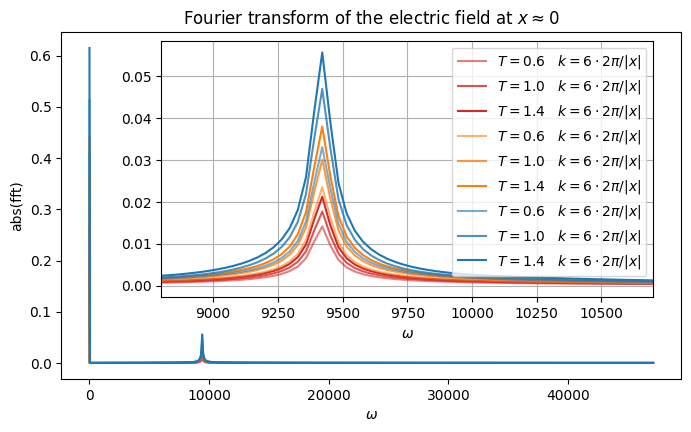

In [31]:
import colorsys

["ne", "Te", "ue", "charge", "potential", "electric"]
["-", "-.", "-", "--", "--", "--"]

fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
inset_ax = fig.add_axes([0.25, 0.291, 0.615, 0.57])

x       = np.array(sols[0].data_full["x"])
x_len   = x[-1] - x[0]
t       = np.array(sols[0].data_full["t"])
dataT1    = [np.array(sol.data_full["electric"]) for sol in sols[0:3]]
dataT2    = [np.array(sol.data_full["electric"]) for sol in sols[3:6]]
dataT3    = [np.array(sol.data_full["electric"]) for sol in sols[6:9]]
k2pi_per_x = [np.round(sol.params["init"]["k"]/2/np.pi*x_len) for sol in sols]
T = [sol.params["init"]["t_0"] for sol in sols]
peak_pos = 9420
probe_index = int(len(x)/2) + 0

ymax = 0
alphas = [0.6, 0.8, 1.0]
for j, (data, ci, style) in enumerate(zip([dataT1, dataT2, dataT3], [3, 1, 0], ['-', '-', '-'])):
    c = colorlist[ci]
    for i, y in enumerate(data):
        y_probe = y[:, probe_index]

        fft = abs(np.fft.rfft(y_probe))
        freq_omega = 2*np.pi * np.fft.rfftfreq(y_probe.shape[-1], d=t[1]-t[0])

        label = "$T = {1:.1f}$   $k = {0:.0f} \cdot 2\pi/|x|$".format(k2pi_per_x[i], T[i])
        ax.plot(freq_omega, fft, style, label=label, color=c, alpha=alphas[i])

        inset_ax.plot(freq_omega, fft, style, label=label, color=c, alpha=alphas[i])
        inset_ax.grid()

        if max(fft[10:]) > ymax:
            ymax = max(fft[10:])

ylim = (-ymax * 0.05, ymax * 1.05)
ylim = (-ymax * 0.05, ymax * 1.05)

#inset_ax.set_ylim(ylim)

ax.set_title(r"Fourier transform of the electric field at $x \approx 0$")
ax.set_xlabel(r"$\omega$")
ax.set_ylabel("abs(fft)")

inset_ax.set_xlabel(r"$\omega$")
#inset_ax.set_xlim((peak_pos-305*2, peak_pos+305*2))
inset_ax.set_xlim((8800, 10700))
inset_ax.set_ylim(ylim)
inset_ax.grid()

inset_ax.legend()
plt.grid()
plt.savefig("Figures/Wiggle_fourier_new", dpi=400)
#plt.show()

___

# We make some illustration wiggles

In [4]:
display(sols[0].params)

{'grid': {'Nx': 1000, 'x': array([-5136.50398862,  5136.50398862])},
 'init': {'type': 'wave',
  'x_a': 0.0,
  'alpha': 0.1,
  'n_l': 1,
  'n_r': 0.2,
  't_l': 1,
  't_r': 0.2,
  'amp': 0.01,
  'n_0': 1,
  'v_0': 0,
  'x_0': 0,
  'k': 0.003669724770642202,
  't_0': 0.6},
 'advection': {'type': 'staggered', 'variant': 'slope-limiter-explicit'},
 'timestepper': {'type': 'ARK',
  'tableau': 'ARK-4-2-3',
  'rtol': 1e-05,
  'atol': 1e-07},
 'physical': {'type': 'original',
  'nu_u': array([3699.99999978,  114.28646516]),
  'nu_n': array([0., 0.]),
  'nu_t': array([0., 0.]),
  'resistivity': 0.0001,
  'mu': 0.00027244371074816386,
  'epsilon_D': 4.145891933094266e-05},
 'bc': {'density': 'PER',
  'velocity': 'PER',
  'pressure': 'PER',
  'potential': 'DIR'},
 'poisson': {'type': 'bicgstab',
  'max_inner': 30,
  'max_outer': 3,
  'l_input': 3,
  'mMax': 10,
  'damping': 0.01,
  'eps': 1e-12},
 'output': {'tend': 0.2, 'maxout': 3000}}

In [5]:
import copy
params1 = copy.deepcopy(sols[0].params)

params1["grid"]["Nx"] = 1000
params1["output"]["tend"] = 0.04
params1["output"]["maxout"] = 6000
params1[""]

solH1 = SolutionClass(params1)

params2 = copy.deepcopy(params1)
params2[]

solH2 = SolutionClass(params2)